# Avvolgitore

## Obiettivo
Determinare la coppia di accelerazione della bobina per portarla in rotazione alla velocità data, svolgendo una quantità data di film.

## Inizializzazione

In [ ]:
import numpy as np
from math import pi
import matplotlib.pyplot as  plt
from mpl_toolkits.mplot3d import axes3d

In [ ]:
mm = 0.001
min = 60 * 1
rpm = 2 * pi / min

## Dati

In [ ]:
d_i = 76 * mm
d_e_max = 500 * mm
l_reel = 800 * mm
rho_reel = 2750 * 0.95
omega_end = 300 * rpm
# s_unwind = 1200 * mm
C_lim = 150

## Svolgimento calcoli

Si ipotizza svolgimento ad accelerazione costante

In [ ]:
# diameter = 300 * mm
diameter_1 = np.linspace(d_i, d_e_max, num=500)
s_unwind_1 =  np.linspace(1, 11, num=500)
diameter, s_unwind = np.meshgrid(diameter_1, s_unwind_1)

In [ ]:
# s_unwind = 0.5 * v_end * delta_t
# s_unwind = 0.5 * acc * delta_t**2
radius = 0.5 * diameter
v_end = omega_end * (radius)
delta_t = 2 * s_unwind / v_end
acc = 2 * s_unwind / delta_t**2
acc_ang = acc/radius

In [ ]:
I_z = 0.5 * pi * (radius**4 - (0.5*d_i)**4) * l_reel * rho_reel

In [ ]:
C_unw = acc_ang * I_z

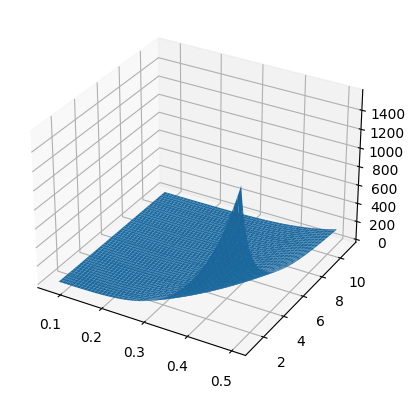

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(diameter, s_unwind, C_unw);

In [ ]:
power_max = C_unw * omega_end

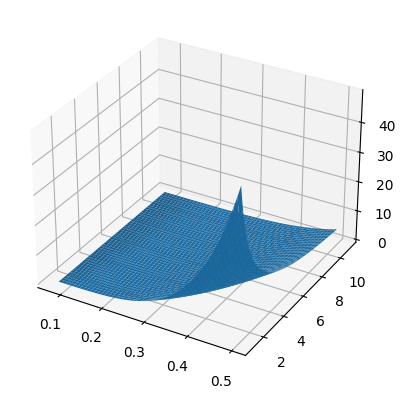

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(diameter, s_unwind, power_max/1000);

In [ ]:
i = 200
arr = C_unw[:, i]
cut_idx = arr < C_lim
max_idx = np.argmax(arr[cut_idx])
s_unwind_1[cut_idx][max_idx]

1.0

In [ ]:
def lim_max(arr):
  cut_idx = arr < C_lim
  max_idx = np.argmax(arr[cut_idx])
  return s_unwind_1[cut_idx][max_idx]

In [ ]:
s_lim = np.apply_along_axis(lim_max, axis=0, arr=C_unw)

Text(0.5, 1.0, 'svolg. min. vs diametro')

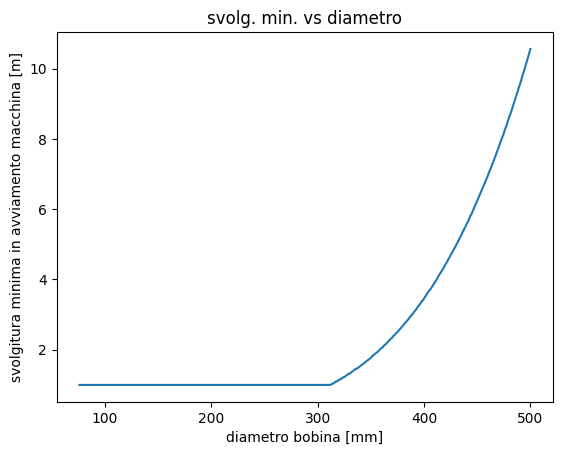

In [ ]:
plt.plot(diameter_1/mm, s_lim)
plt.xlabel("diametro bobina [mm]")
plt.ylabel("svolgitura minima in avviamento macchina [m]")
plt.title("svolg. min. vs diametro")